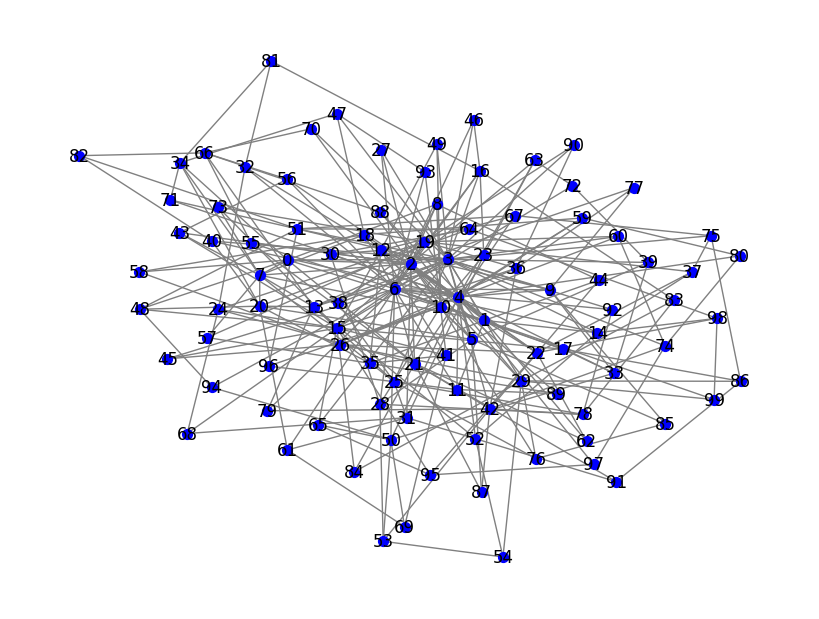

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
# Ex 1
def generate_ba_graph(n, m):
    if m < 1 or m >= n:
        raise ValueError("m must be greater than 0 and less than n.")
    
    G = nx.Graph()
    for i in range(m):
        for j in range(i + 1, m):
            G.add_edge(i, j)
    
    degrees = [0] * n
    for u, v in G.edges():
        degrees[u] += 1
        degrees[v] += 1
    
    for new_node in range(m, n):
        targets = set()
        
        while len(targets) < m:
            potential_target = random.choices(
                population=list(G.nodes),
                weights=[degrees[node] for node in G.nodes],
                k=1
            )[0]
            targets.add(potential_target)
        
        for target in targets:
            G.add_edge(new_node, target)
            degrees[new_node] += 1
            degrees[target] += 1
    
    return G

G = generate_ba_graph(100, 3)
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_size=50, node_color='blue', edge_color='gray')
plt.show()

# ADD LOGS for bins

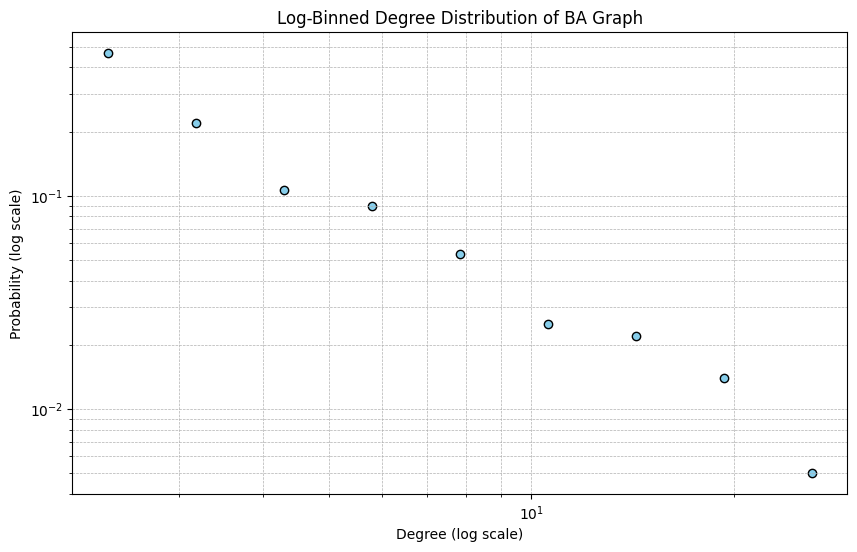

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example generate_ba_graph function (use your own implementation)
def generate_ba_graph(n, m):
    import networkx as nx
    return nx.barabasi_albert_graph(n, m)

# Logarithmic binning
def logarithmic_binning(degrees, bins=10):
    min_degree = min(degrees)
    max_degree = max(degrees)
    bins_edges = np.logspace(np.log10(min_degree), np.log10(max_degree), bins)
    hist, bin_edges = np.histogram(degrees, bins=bins_edges)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return bin_centers, hist

# Generate BA graph and degree distribution
def generate_ba_graph_and_degree_distribution(n, m, num_runs=10):
    all_degrees = []

    for _ in range(num_runs):
        G = generate_ba_graph(n, m)
        degrees = [degree for _, degree in G.degree()]
        all_degrees.extend(degrees)

    return all_degrees

# Plot degree distribution with logarithmic binning
def plot_degree_distribution_with_binning(degrees):
    bin_centers, binned_counts = logarithmic_binning(degrees, bins=10)
    binned_counts = binned_counts / sum(binned_counts)  # Normalize for probability distribution

    plt.figure(figsize=(10, 6))
    plt.scatter(bin_centers, binned_counts, color="skyblue", edgecolor="black")
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Probability (log scale)")
    plt.title("Log-Binned Degree Distribution of BA Graph")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

n = 100  # Number of nodes
m = 2    # Number of edges to attach from a new node to existing nodes
num_runs = 10  # Number of runs for averaging

all_degrees = generate_ba_graph_and_degree_distribution(n, m, num_runs)
plot_degree_distribution_with_binning(all_degrees)


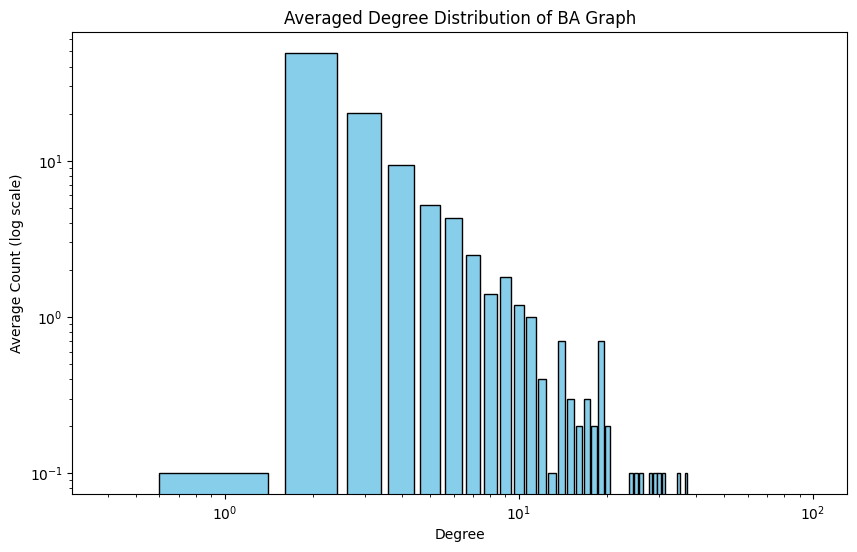

In [3]:
# Ex3
def generate_ba_graph_and_degree_distribution(n, m, num_runs=10):
    degree_counts = np.zeros(n)

    for _ in range(num_runs):
        G = generate_ba_graph(n, m)
        degrees = [degree for _, degree in G.degree()]
        hist, _ = np.histogram(degrees, bins=np.arange(0, max(degrees) + 2))
        degree_counts[:len(hist)] += hist  # Accumulate degree counts

    degree_counts /= num_runs

    return degree_counts

def plot_degree_distribution(degree_counts):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(degree_counts)), degree_counts, color="skyblue", edgecolor="black")
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel("Degree")
    plt.ylabel("Average Count (log scale)")
    plt.title("Averaged Degree Distribution of BA Graph")
    plt.show()

n = 100  
m = 2   
num_runs = 10  

degree_counts = generate_ba_graph_and_degree_distribution(n, m, num_runs)
plot_degree_distribution(degree_counts)

# Alpha is wrong

In [3]:
# Ex4
def estimate_alpha(degree_counts):
    degrees = np.arange(len(degree_counts))
    nonzero_degrees = degrees[degree_counts > 0]
    nonzero_counts = degree_counts[degree_counts > 0]

    log_k = np.log(nonzero_degrees)
    log_Pk = np.log(nonzero_counts)

    slope, _ = np.polyfit(log_k, log_Pk, 1)
    
    alpha = -slope
    return alpha

alpha = estimate_alpha(degree_counts)
print("Estimated alpha:", alpha)


Estimated alpha: 2.1774539458002393


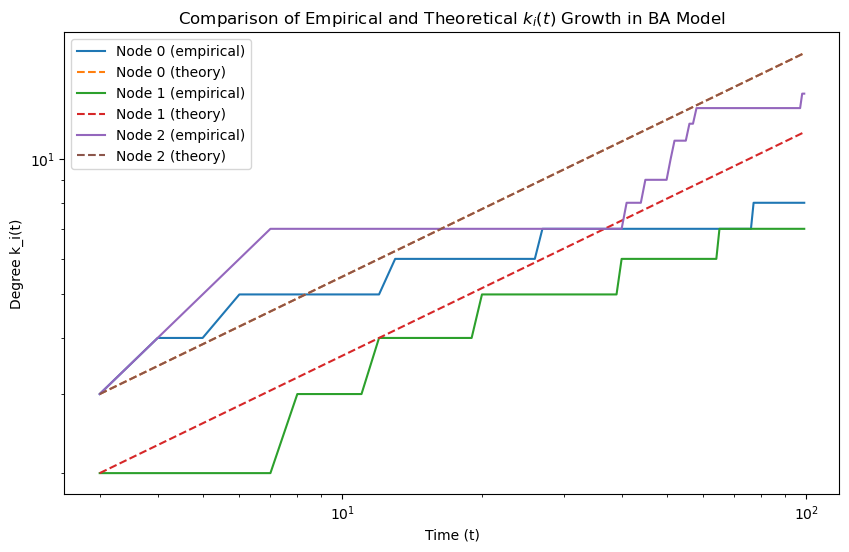

In [4]:
# Ex5
def simulate_ba_growth(n, m):
    # Initialize the BA graph with a complete graph of m + 1 nodes
    G = nx.complete_graph(m + 1)
    degree_history = {node: [] for node in range(m + 1)}  # Track degrees of initial nodes

    for t in range(m + 1, n):
        # Add new node with m edges using preferential attachment
        G.add_node(t)
        targets = set()
        while len(targets) < m:
            potential_target = np.random.choice(
                list(G.nodes),
                p=[G.degree(node) / (2 * len(G.edges)) for node in G.nodes]
            )
            targets.add(potential_target)
        G.add_edges_from((t, target) for target in targets)

        # Record the degree of the initial nodes at each timestep
        for node in degree_history:
            degree_history[node].append(G.degree(node))

    return degree_history

def plot_ki_t_comparison(degree_history, n):
    plt.figure(figsize=(10, 6))

    for node, degrees in degree_history.items():
        t_values = np.arange(len(degrees)) + len(degree_history)
        plt.plot(t_values, degrees, label=f'Node {node} (empirical)')
        
        # Theoretical line for comparison: k_i(t) = (t / t_i)^(0.5)
        t_i = len(degree_history)  # Time when initial nodes were added
        theoretical_k = (t_values / t_i) ** 0.5 * degrees[0]  # Scale to initial degree
        plt.plot(t_values, theoretical_k, linestyle="--", label=f'Node {node} (theory)')

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Time (t)")
    plt.ylabel("Degree k_i(t)")
    plt.legend()
    plt.title("Comparison of Empirical and Theoretical $k_i(t)$ Growth in BA Model")
    plt.show()

n = 100  
m = 2

degree_history = simulate_ba_growth(n, m)
plot_ki_t_comparison(degree_history, n)

# Add theoretical value

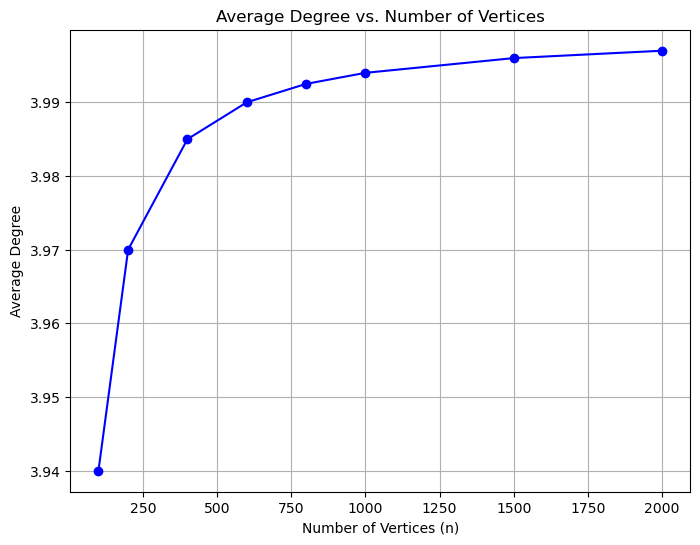

In [5]:
# 6.4
n_values = [100, 200, 400, 600, 800, 1000, 1500, 2000]  
m = 2                         
iterations = 100                  

time_steps = list(range(iterations))
avg_degrees_by_time = {n: [] for n in n_values}
avg_degrees_by_vertices = []

for n in n_values:
    G = generate_ba_graph(n, m)
    
    for t in range(1, iterations + 1):
        subgraph = G.subgraph(range(t))
        avg_degree = np.mean([deg for _, deg in subgraph.degree()])
        avg_degrees_by_time[n].append(avg_degree)
    
    avg_degrees_by_vertices.append(np.mean([deg for _, deg in G.degree()]))


# Average Degree by Number of Vertices
plt.figure(figsize=(8, 6))
plt.plot(n_values, avg_degrees_by_vertices, marker='o', color='b')
plt.title("Average Degree vs. Number of Vertices")
plt.xlabel("Number of Vertices (n)")
plt.ylabel("Average Degree")
plt.grid()
plt.show()

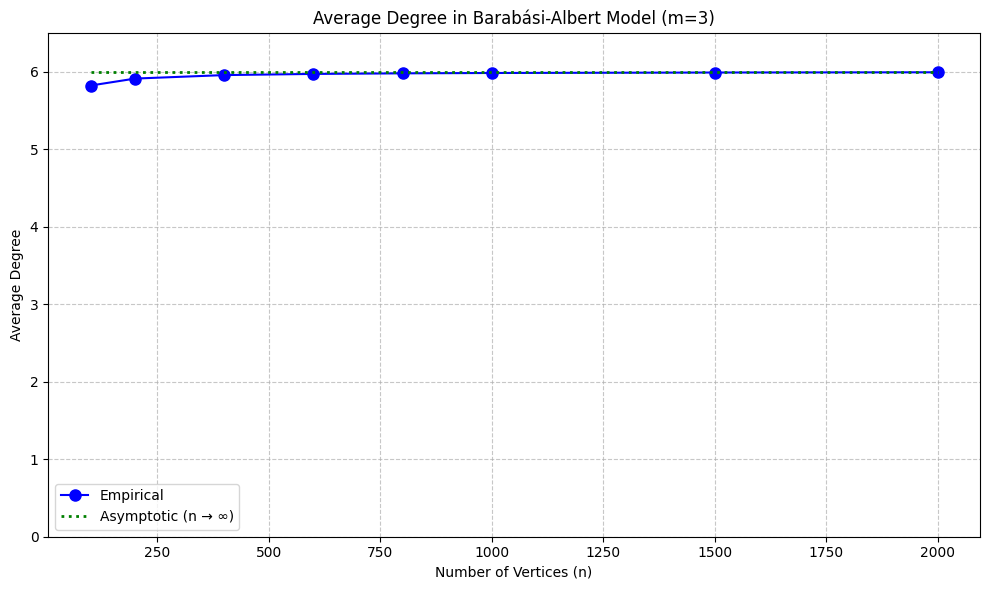

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def generate_ba_graph(n, m):
    return nx.barabasi_albert_graph(n, m)

# Parameters
n_values = [100, 200, 400, 600, 800, 1000, 1500, 2000]
m = 3
iterations = 100
time_steps = list(range(iterations))

# Calculate empirical average degrees
avg_degrees_by_time = {n: [] for n in n_values}
avg_degrees_by_vertices = []

for n in n_values:
    G = generate_ba_graph(n, m)
    for t in range(1, iterations + 1):
        subgraph = G.subgraph(range(t))
        avg_degree = np.mean([deg for _, deg in subgraph.degree()])
        avg_degrees_by_time[n].append(avg_degree)
    avg_degrees_by_vertices.append(np.mean([deg for _, deg in G.degree()]))

# For BA model, theoretical average degree approaches 2m with finite size correction: 2m(1 - 1/sqrt(n))
# theoretical_degrees = [2 * m * (1 - 1/np.sqrt(n)) for n in n_values]
asymptotic_degree = [2 * m] * len(n_values)  # The asymptotic value 2m

plt.figure(figsize=(10, 6))

plt.plot(n_values, avg_degrees_by_vertices, 'bo-', label='Empirical', markersize=8)

# plt.plot(n_values, theoretical_degrees, 'r--', label='Theoretical (finite n)', linewidth=2)
plt.plot(n_values, asymptotic_degree, 'g:', label='Asymptotic (n → ∞)', linewidth=2)

plt.title('Average Degree in Barabási-Albert Model (m={})'.format(m))
plt.xlabel('Number of Vertices (n)')
plt.ylabel('Average Degree')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.ylim(0, max(max(avg_degrees_by_vertices), 2*m) + 0.5)

plt.tight_layout()
plt.show()